<a href="https://colab.research.google.com/github/akhileshgt/Movie-Recommendation-System/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#changing the working directory
%cd /content/gdrive/MyDrive/colab/Movie_Recommender
#Check the present working directory using pwd command

/content/gdrive/MyDrive/colab/Movie_Recommender


In [4]:
pwd

'/content/gdrive/MyDrive/colab/Movie_Recommender'

In [5]:
ls

dataset/  scripts/


In [6]:
# Import packages
import os
import pandas as pd

In [7]:
#file directories
user_file = './dataset/dat_files/users.dat'
rating_file = './dataset/dat_files/ratings.dat'
movie_file = './dataset/dat_files/movies.dat'

In [8]:
# Specify User's Age and Occupation Column
ages = { 1: "Under 18", 18: "18-24", 25: "25-34", 35: "35-44", 45: "45-49", 50: "50-55", 56: "56+" }
occupations = { 0: "other or not specified", 1: "academic/educator", 2: "artist", 3: "clerical/admin",
                4: "college/grad student", 5: "customer service", 6: "doctor/health care",
                7: "executive/managerial", 8: "farmer", 9: "homemaker", 10: "K-12 student", 11: "lawyer",
                12: "programmer", 13: "retired", 14: "sales/marketing", 15: "scientist", 16: "self-employed",
                17: "technician/engineer", 18: "tradesman/craftsman", 19: "unemployed", 20: "writer" }

In [9]:
# Define csv files to be saved into
users_csv_file = './dataset/csv_files/users.csv'
movies_csv_file = './dataset/csv_files/movies.csv'
ratings_csv_file = './dataset/csv_files/ratings.csv'

In [10]:
# Read the Ratings File
ratings = pd.read_csv("./dataset/dat_files/ratings.dat", 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['user_id', 'movie_id', 'rating', 'timestamp'])

In [11]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [12]:
max_userid = ratings['user_id'].drop_duplicates().max()
max_movieid = ratings['movie_id'].drop_duplicates().max()

In [13]:
#prcessing for Keras deep learning model
# Add user_emb_id column whose values == user_id - 1
ratings['user_emb_id'] = ratings['user_id']-1
# Add movie_emb_id column whose values == movie_id - 1
ratings['movie_emb_id'] = ratings['movie_id'] - 1

print (len(ratings), 'ratings loaded')

1000209 ratings loaded


In [14]:
# Save into ratings.csv
ratings.to_csv(ratings_csv_file, 
               sep='\t', 
               header=True, 
               encoding='latin-1', 
               columns=['user_id', 'movie_id', 'rating', 'timestamp', 'user_emb_id', 'movie_emb_id'])
print ('Saved to', ratings_csv_file)

Saved to ./dataset/csv_files/ratings.csv


In [15]:
#read users file
users = pd.read_csv("./dataset/dat_files/users.dat", 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['user_id', 'gender', 'age', 'occupation', 'zipcode'])

In [16]:
users.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [17]:
users['age_desc'] = users['age'].apply(lambda x: ages[x])
users['occ_desc'] = users['occupation'].apply(lambda x: occupations[x])
print (len(users), 'descriptions of', max_userid, 'users loaded.')

6040 descriptions of 6040 users loaded.


In [18]:
# Save into users.csv
users.to_csv(users_csv_file, 
             sep='\t', 
             header=True, 
             encoding='latin-1',
             columns=['user_id', 'gender', 'age', 'occupation', 'zipcode', 'age_desc', 'occ_desc'])
print ('Saved to', users_csv_file)

Saved to ./dataset/csv_files/users.csv


In [19]:
# Read the Movies File
movies = pd.read_csv(movie_file, 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['movie_id', 'title', 'genres'])
print (len(movies), 'descriptions of', max_movieid, 'movies loaded.')

3883 descriptions of 3952 movies loaded.


In [20]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
# Save into movies.csv
movies.to_csv(movies_csv_file, 
              sep='\t', 
              header=True, 
              columns=['movie_id', 'title', 'genres'])
print ('Saved to', movies_csv_file)

Saved to ./dataset/csv_files/movies.csv


# Data Preparation

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Reading ratings file
ratings = pd.read_csv('./dataset/csv_files/ratings.csv', 
                      sep='\t', 
                      encoding='latin-1', 
                      usecols=['user_id', 'movie_id', 'rating'])

# Reading users file
users = pd.read_csv('./dataset/csv_files/users.csv', 
                    sep='\t', encoding='latin-1', 
                    usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('./dataset/csv_files/movies.csv', 
                     sep='\t', encoding='latin-1', 
                     usecols=['movie_id', 'title', 'genres'])

In [24]:
# file info
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB
None


In [25]:
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   6040 non-null   int64 
 1   gender    6040 non-null   object
 2   zipcode   6040 non-null   object
 3   age_desc  6040 non-null   object
 4   occ_desc  6040 non-null   object
dtypes: int64(1), object(4)
memory usage: 236.1+ KB
None


In [26]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None


# Data Exploration

In [27]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

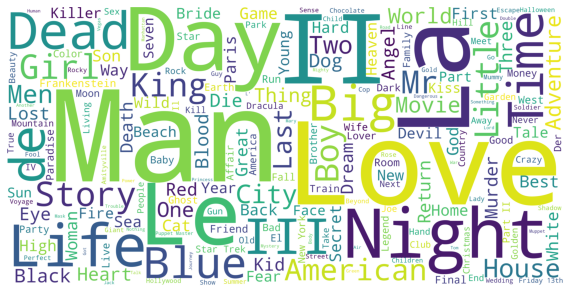

In [28]:
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(10,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [29]:
title_corpus

"Toy Story (1995) Jumanji (1995) Grumpier Old Men (1995) Waiting to Exhale (1995) Father of the Bride Part II (1995) Heat (1995) Sabrina (1995) Tom and Huck (1995) Sudden Death (1995) GoldenEye (1995) American President, The (1995) Dracula: Dead and Loving It (1995) Balto (1995) Nixon (1995) Cutthroat Island (1995) Casino (1995) Sense and Sensibility (1995) Four Rooms (1995) Ace Ventura: When Nature Calls (1995) Money Train (1995) Get Shorty (1995) Copycat (1995) Assassins (1995) Powder (1995) Leaving Las Vegas (1995) Othello (1995) Now and Then (1995) Persuasion (1995) City of Lost Children, The (1995) Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) Dangerous Minds (1995) Twelve Monkeys (1995) Wings of Courage (1995) Babe (1995) Carrington (1995) Dead Man Walking (1995) Across the Sea of Time (1995) It Takes Two (1995) Clueless (1995) Cry, the Beloved Country (1995) Richard III (1995) Dead Presidents (1995) Restoration (1995) Mortal Kombat (1995) To Die For (1995) How to Make an 

<h2>Ratings</h2>

In [30]:
# Get summary statistics of rating
ratings['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [31]:
ratings_median = ratings['rating'].median()

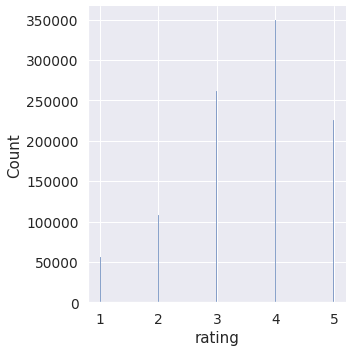

In [32]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.25)
%matplotlib inline

# Display distribution of rating
sns.displot(ratings['rating'].fillna(ratings_median))

In [33]:
# merge all three datasets
merged_dataset = pd.merge(pd.merge(movies,ratings),users)
# 20 movies with highest ratings
merged_dataset[['title','genres','rating']].sort_values('rating',ascending = False).head(20)

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5
489237,Rushmore (1998),Comedy,5
489236,"Simple Plan, A (1998)",Crime|Thriller,5
489226,Hands on a Hard Body (1996),Documentary,5
489224,Pleasantville (1998),Comedy,5
489212,Say Anything... (1989),Comedy|Drama|Romance,5


In [34]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [35]:
genre_labels

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [36]:
# function for counting the number of time genre keyword occurs
def genre_count(dataset, census, col):
    word_count = dict()
    for s in census:
        word_count[s] = 0
    for word in dataset[col].str.split('|'):
        if type(word) == float and pd.isnull(word): 
            continue
        for s in [s for s in word if s in census]: 
            if pd.notnull(s): 
                word_count[s] += 1 
    keyword_occurences = []
    for k,v in word_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, word_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = genre_count(movies, genre_labels, 'genres')
keyword_occurences[:5]

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471]]

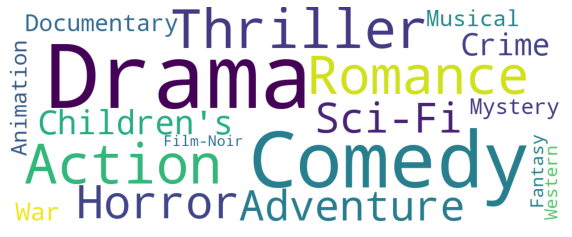

In [37]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]
    
# Create the wordcloud
genre_wc = WordCloud(width=1000,height=400, background_color='white')
genre_wc.generate_from_frequencies(genres)

# Plot the wordcloud
plt.figure(figsize=(10,8))
plt.imshow(genre_wc)
plt.axis('off')
plt.show()

# Content Based Model

In [38]:
# Break up the big genre string into a string array
movies['genres'] = movies['genres'].str.split('|')
# Convert genres to string value
movies['genres'] = movies['genres'].fillna("").astype('str')

In [39]:
movies['genres']

0        ['Animation', "Children's", 'Comedy']
1       ['Adventure', "Children's", 'Fantasy']
2                        ['Comedy', 'Romance']
3                          ['Comedy', 'Drama']
4                                   ['Comedy']
                         ...                  
3878                                ['Comedy']
3879                                 ['Drama']
3880                                 ['Drama']
3881                                 ['Drama']
3882                     ['Drama', 'Thriller']
Name: genres, Length: 3883, dtype: object

<h2> TF-IDF </h2>

In [40]:
# tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
# Create the transform
tf = TfidfVectorizer(analyzer ='word', ngram_range = (1,2), min_df = 0, stop_words='english')
# tokenize ,build vocab and encode document
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(3883, 127)

In [41]:
print(len(tf.vocabulary_))

127


In [42]:
print(tf.idf_.shape)

(127,)


In [43]:
print(tfidf_matrix.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
# Cosine Similarity using linear kernel
# tf idf functionality produces normalized vectors, in which case cosine_similarity is equivalent to linear_kernel
from sklearn.metrics.pairwise import linear_kernel
cosine_sim_tfidf = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim_tfidf[:4, :4]

array([[1.        , 0.14193614, 0.09010857, 0.1056164 ],
       [0.14193614, 1.        , 0.        , 0.        ],
       [0.09010857, 0.        , 1.        , 0.1719888 ],
       [0.1056164 , 0.        , 0.1719888 , 1.        ]])

In [45]:
cosine_sim_tfidf.shape

(3883, 3883)

In [46]:
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def recommend_movies_tfidf(title):
  idx = indices[title]
  sorted_arr = np.argsort(cosine_sim_tfidf[idx])
  sorted_arr = sorted_arr[-21:-1]
  return titles.iloc[sorted_arr]

In [47]:
indices

title
Toy Story (1995)                         0
Jumanji (1995)                           1
Grumpier Old Men (1995)                  2
Waiting to Exhale (1995)                 3
Father of the Bride Part II (1995)       4
                                      ... 
Meet the Parents (2000)               3878
Requiem for a Dream (2000)            3879
Tigerland (2000)                      3880
Two Family House (2000)               3881
Contender, The (2000)                 3882
Length: 3883, dtype: int64

In [48]:
# Recommendation using TF-IDF technique
recommend_movies_tfidf('Toy Story (1995)').head(20)

3546                                      Dinosaur (2000)
3218                             Tigger Movie, The (2000)
241                               Gumby: The Movie (1995)
876     Land Before Time III: The Time of the Great Gi...
2070                           Secret of NIMH, The (1982)
2068                               Charlotte's Web (1973)
2054                         All Dogs Go to Heaven (1989)
2731        Little Nemo: Adventures in Slumberland (1992)
1964                           Black Cauldron, The (1985)
3414                        Road to El Dorado, The (2000)
236                                 Goofy Movie, A (1995)
3542                                Saludos Amigos (1943)
2073           American Tail: Fievel Goes West, An (1991)
1050               Aladdin and the King of Thieves (1996)
2285                            Rugrats Movie, The (1998)
2286                                 Bug's Life, A (1998)
3045                                   Toy Story 2 (1999)
3682          

In [49]:
# Recommendation using TF-IDF technique
recommend_movies_tfidf('Good Will Hunting (1997)').head(20)

3261                         Splendor in the Grass (1961)
3262                                      My Tutor (1983)
2538                                      Get Real (1998)
3264                 Killing of Sister George, The (1968)
809     Death in the Garden (Mort en ce jardin, La) (1...
3267                              It Happened Here (1961)
3283                               Brown's Requiem (1998)
2534                                           NÃ´ (1998)
377                       When a Man Loves a Woman (1994)
812                            Collectionneuse, La (1967)
813                                  Kaspar Hauser (1993)
815                                      Diebinnen (1995)
816                     Convent, The (Convento, O) (1995)
2523                                Joyriders, The (1999)
2521                                 Hideous Kinky (1998)
3278                                Never Cry Wolf (1983)
371                                   Safe Passage (1994)
2519          

In [50]:
# Recommendation using TF-IDF technique
recommend_movies_tfidf('Saving Private Ryan (1998)').head(20)

1870              Best Years of Our Lives, The (1946)
1230             Bridge on the River Kwai, The (1957)
3655                               Coming Home (1978)
1162                            Paths of Glory (1957)
2821                               Three Kings (1999)
3308                          Hangmen Also Die (1943)
3074                       Hell in the Pacific (1968)
3677    Butterfly (La Lengua de las Mariposas) (2000)
2993                          Longest Day, The (1962)
2358                        Thin Red Line, The (1998)
1959                       Saving Private Ryan (1998)
1545                                 G.I. Jane (1997)
3559                             Flying Tigers (1942)
3684                              Patriot, The (2000)
1214                      Boat, The (Das Boot) (1981)
3574                     Fighting Seabees, The (1944)
108                                 Braveheart (1995)
3585                     Guns of Navarone, The (1961)
461                         

<h2>Count Vectorizer</h2>

In [51]:
# Count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Create a Vectorizer Object
vectorizer = CountVectorizer()
# Encode the Document  
cv_matrix = vectorizer.fit_transform(movies['genres'])
arr_CountVec = cv_matrix.toarray()

In [52]:
cv_matrix.shape

(3883, 20)

In [53]:
print("Vocabulary: ", len(vectorizer.vocabulary_))
print("Vocabulary: ", vectorizer.vocabulary_)
print("Length of Encoded Document is:", cv_matrix.shape)
print("Encoded Document is:", arr_CountVec)

Vocabulary:  20
Vocabulary:  {'animation': 2, 'children': 3, 'comedy': 4, 'adventure': 1, 'fantasy': 8, 'romance': 15, 'drama': 7, 'action': 0, 'crime': 5, 'thriller': 17, 'horror': 11, 'sci': 16, 'fi': 9, 'documentary': 6, 'war': 18, 'musical': 12, 'mystery': 13, 'film': 10, 'noir': 14, 'western': 19}
Length of Encoded Document is: (3883, 20)
Encoded Document is: [[0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [54]:
# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_cv = cosine_similarity(cv_matrix, cv_matrix)
cosine_sim_cv[:4, :4]

array([[1.        , 0.33333333, 0.40824829, 0.40824829],
       [0.33333333, 1.        , 0.        , 0.        ],
       [0.40824829, 0.        , 1.        , 0.5       ],
       [0.40824829, 0.        , 0.5       , 1.        ]])

In [55]:
cosine_sim_cv.shape

(3883, 3883)

In [56]:
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# function to recommend movies (CountVectorizer)
def recommend_movies_cv(title):
  idx = indices[title]
  sorted_arr = np.argsort(cosine_sim_cv[idx])
  sorted_arr = sorted_arr[-21:-1]
  return titles.iloc[sorted_arr]

In [57]:
# Recommendation using CountVectorizer technique
recommend_movies_cv('Toy Story (1995)')

1966                         Blackbeard's Ghost (1968)
2497                           Doug's 1st Movie (1999)
1963                    Barefoot Executive, The (1971)
3218                          Tigger Movie, The (2000)
1945                              Freaky Friday (1977)
1949                                      Bambi (1942)
3144               Batman: Mask of the Phantasm (1993)
2009                           Jungle Book, The (1967)
2033                           Steamboat Willie (1940)
584                                     Aladdin (1992)
236                              Goofy Movie, A (1995)
3045                                Toy Story 2 (1999)
1050            Aladdin and the King of Thieves (1996)
3685    Adventures of Rocky and Bullwinkle, The (2000)
2286                              Bug's Life, A (1998)
2073        American Tail: Fievel Goes West, An (1991)
2072                          American Tail, An (1986)
3542                             Saludos Amigos (1943)
3682      

In [58]:
print(set(recommend_movies_cv('Toy Story (1995)'))-set(recommend_movies_tfidf('Toy Story (1995)')))
print(set(recommend_movies_tfidf('Toy Story (1995)'))- set(recommend_movies_cv('Toy Story (1995)')))

{'Jungle Book, The (1967)', 'Freaky Friday (1977)', 'Barefoot Executive, The (1971)', 'Bambi (1942)', "Blackbeard's Ghost (1968)", "Doug's 1st Movie (1999)", 'Aladdin (1992)', 'Batman: Mask of the Phantasm (1993)', 'Steamboat Willie (1940)'}
{'Gumby: The Movie (1995)', 'Secret of NIMH, The (1982)', 'All Dogs Go to Heaven (1989)', 'Little Nemo: Adventures in Slumberland (1992)', 'Road to El Dorado, The (2000)', 'Black Cauldron, The (1985)', "Charlotte's Web (1973)", 'Dinosaur (2000)', 'Land Before Time III: The Time of the Great Giving (1995)'}


# Collabrative Filtering 


In [59]:
# Fill Nan values in userid and movieid column with 0
ratings['movie_id'] = ratings['movie_id'].fillna(0)
ratings['user_id'] = ratings['user_id'].fillna(0)

In [60]:
# Randomly sample 2% of the ratings dataset
small_dataset = ratings.sample(frac=0.03)
# Check the sample info
print(small_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30006 entries, 396177 to 905816
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   30006 non-null  int64
 1   movie_id  30006 non-null  int64
 2   rating    30006 non-null  int64
dtypes: int64(3)
memory usage: 937.7 KB
None


In [61]:
# split into training and testing 
from sklearn.model_selection import train_test_split as tts
train_data, test_data = tts(small_dataset, test_size = 0.2, shuffle = True)

In [62]:
# Creating two user matrix, one for testing and other for training
train_data_matrix = train_data[['user_id', 'movie_id', 'rating']].to_numpy()
test_data_matrix = test_data[['user_id', 'movie_id', 'rating']].to_numpy()

In [63]:
# Check their shape
print(train_data_matrix.shape)
print(test_data_matrix.shape)

(24004, 3)
(6002, 3)


In [64]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(train_data, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[:4, :4])

[[ 1.          0.83384844  0.89867964 -0.00249487]
 [ 0.83384844  1.          0.99147006  0.54991141]
 [ 0.89867964  0.99147006  1.          0.4363622 ]
 [-0.00249487  0.54991141  0.4363622   1.        ]]


In [65]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation[:4, :4])

[[ 1.         -0.01210409  0.02369841]
 [-0.01210409  1.         -0.05992938]
 [ 0.02369841 -0.05992938  1.        ]]


In [66]:
# Function to predict ratings
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [67]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [68]:
# Predict ratings on the training data with both similarity score
user_prediction = predict(train_data_matrix, user_correlation, type='user')
item_prediction = predict(train_data_matrix, item_correlation, type='item')

# RMSE on the test data
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 1416.971763610488
Item-based CF RMSE: 1634.0517279163919


In [69]:
# RMSE on the train data
print('User-based CF RMSE: ' + str(rmse(user_prediction, train_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data_matrix)))

User-based CF RMSE: 696.5902759583772
Item-based CF RMSE: 137.96159890237328
